# Imported Required Library 

In [29]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers,Sequential,Model
from tensorflow.keras.utils import to_categorical

from PIL import Image

import cv2

import os

import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset in a program(Parasitized)

In [2]:
direct1 = ("C:/Users/atul8/Desktop/images/")

In [3]:
image_dir = os.listdir(direct1 + "parasitized/")


In [4]:
lst2 =[]
lbl2 =[]
size = 64

# pre-processing of data(Parasitized)

In [5]:
for i,im_dir in enumerate(image_dir):
     if im_dir.split(".")[1]=="png":
        img = cv2.imread(direct1+ "parasitized/"+im_dir)
        img = Image.fromarray(img,"RGB")
        img = img.resize((size,size))
        lst2.append(np.array(img))
        lbl2.append(0)
    


#  Checking the size and length for all images ( same or not) After pre-processing

In [6]:
len(lst2)

500

In [7]:
len(lbl2)

500

In [8]:
lst2[20].size

lst2[200].size

lst2[450].size

lst2[499].size



12288

# Loading Dataset in a program(uninfected)

In [9]:
direct2 = "C:/Users/atul8/Desktop/images/"

In [10]:
img_dire2 = os.listdir(direct2+"uninfected/")

# pre-processing of data(Uninifected)

In [11]:
for y ,dir1 in enumerate(img_dire2):
    if dir1.split(".")[1]=="png":
        img11 =cv2.imread(direct2+"uninfected/"+dir1)
        img11 =Image.fromarray(img11,"RGB")
        img11 =img11.resize((size,size))
        lst2.append(np.array(img11))
        lbl2.append(1)
        
        

# Checking the size and length for all images ( same or not) After pre-processing(uninfected)

In [12]:
len(lst2)
len(lbl2)

1000

In [13]:
lst2[223].size
lst2[330].size
lst2[444].size
lst2[199].size

12288

In [15]:
lst2[400].shape

(64, 64, 3)

# CNN MODEL

In [19]:
input_shape = (size,size,3)
int1 = layers.Input(shape = input_shape)
cnn1 = layers.Conv2D(32,(3,3),activation ="relu",padding ="same")(int1)
pool1 = layers.MaxPooling2D(pool_size = (2,2))(cnn1)
norm = layers.BatchNormalization(axis = -1)(pool1)
drop = layers.Dropout(0.20)(norm)

# CNN MODEL2

In [21]:
cnn2 = layers.Conv2D(32,(3,3),activation ="relu",padding ="same")(drop)
pool2 = layers.MaxPooling2D(pool_size = (2,2))(cnn2)
norm1 = layers.BatchNormalization(axis = -1)(pool2)
drop2 = layers.Dropout(0.20)(norm1)

# FLATTEN LAYER

In [22]:
flat = layers.Flatten()(drop2)

# FIRST HIDDEN LAYER(DENSE)

In [23]:
hidden1 = layers.Dense(512,activation = "relu")(flat)
norm3 = layers.BatchNormalization(axis = -1)(hidden1)
drop3 = layers.Dropout(rate =0.20)(norm3)

# SECCOND HIDDEN LAYER(DENSE)

In [24]:
hidden2 = layers.Dense(256,activation = "relu")(drop3)
norm4 = layers.BatchNormalization(axis = -1)(hidden2)
drop4 = layers.Dropout(rate =0.20)(norm4)

# OUTPUT LAYER AND MODEL CREATION

In [26]:
out = layers.Dense(2,activation = "softmax")(drop4)

In [27]:
model =Model(inputs = int1,outputs = out)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0     

# COVERTING LIST IN ARRAY(NUMPY) FORMAT

In [30]:
label_cat = to_categorical(np.array(lbl2))

# SPLITTING 

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(lst2,label_cat,test_size = 0.20,random_state=0)

len(x_train)


800

In [36]:
len(x_test)

200

# COMPILING THE MODEL

In [46]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0     

In [73]:
 history =model.fit(np.array(x_train),np.array(y_train),epochs =12,validation_split =0.1,verbose =1,shuffle =False)

Epoch 1/12
23/23 [==============================] - 4s 162ms/step - loss: 8.6327e-04 - accuracy: 1.0000 - val_loss: 0.3017 - val_accuracy: 0.9500
Epoch 2/12
23/23 [==============================] - 4s 167ms/step - loss: 2.1468e-04 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9750
Epoch 3/12
23/23 [==============================] - 4s 173ms/step - loss: 3.1490e-04 - accuracy: 1.0000 - val_loss: 0.1953 - val_accuracy: 0.9750
Epoch 4/12
23/23 [==============================] - 4s 169ms/step - loss: 2.9762e-04 - accuracy: 1.0000 - val_loss: 0.3017 - val_accuracy: 0.9500
Epoch 5/12
23/23 [==============================] - 4s 163ms/step - loss: 2.0326e-04 - accuracy: 1.0000 - val_loss: 0.1968 - val_accuracy: 0.9750
Epoch 6/12
23/23 [==============================] - 4s 162ms/step - loss: 1.1582e-04 - accuracy: 1.0000 - val_loss: 0.1573 - val_accuracy: 0.9750
Epoch 7/12
23/23 [==============================] - 4s 174ms/step - loss: 1.1164e-04 - accuracy: 1.0000 - val_loss: 0.1485 -

# EVALUATION

In [74]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test),np.array(y_test))[1]*100))

7/7 [==============================] - 0s 36ms/step - loss: 0.1124 - accuracy: 0.9800
Test_Accuracy: 98.00%


# PLOTTING 

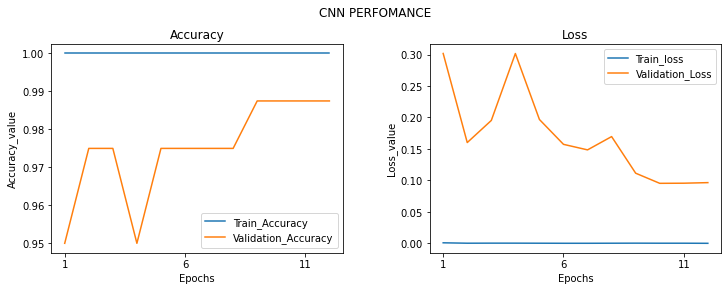

In [75]:
f,(ax1,ax2) = plt.subplots(1,2,figsize= (12,4))
t = f.suptitle("CNN PERFOMANCE",fontsize =12)
f.subplots_adjust(top =0.85,wspace =0.3)
max_epoch = len(history.history["accuracy"])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list,history.history["accuracy"],label="Train_Accuracy")
ax1.plot(epoch_list,history.history["val_accuracy"],label="Validation_Accuracy")
ax1.set_xticks(np.arange(1,max_epoch,5))
ax1.set_ylabel("Accuracy_value")
ax1.set_xlabel("Epochs")
ax1.set_title("Accuracy")
l1 =ax1.legend(loc ="best")
ax2.plot(epoch_list,history.history["loss"],label="Train_loss")
ax2.plot(epoch_list,history.history["val_loss"],label="Validation_Loss")
ax2.set_xticks(np.arange(1,max_epoch,5))
ax2.set_ylabel("Loss_value")
ax2.set_xlabel("Epochs")
ax2.set_title("Loss")
l2=ax2.legend(loc ="best")